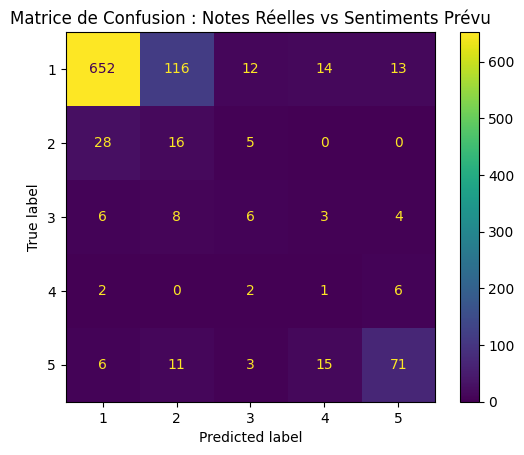

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset_path = './data/Tesla_Trustpilot_Reviews_Analyzed.csv'  
data = pd.read_csv(dataset_path)

label_to_rating = {
    "très négatif": 1,
    "négatif": 2,
    "neutre": 3,
    "positif": 4,
    "très positif": 5
}

data['predicted_rating'] = data['sentiment_label'].map(label_to_rating)

y_true = data['Rating']
y_pred = data['predicted_rating']

conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap="viridis", values_format='d')
plt.title("Matrice de Confusion : Notes Réelles vs Sentiments Prévu")
plt.show()


Explication des axes :
Axe vertical (True label) : Ce sont les notes réelles données par les utilisateurs (1 à 5).
Axe horizontal (Predicted label) : Ce sont les prédictions du modèle après l'analyse des sentiments (1 à 5).
Analyse des cases :
Chaque case contient le nombre d'éléments correspondants à une combinaison donnée de prédiction et de vérité.
Par exemple, la case en haut à gauche (652) signifie que 652 prédictions pour une note réelle de 1 ont été correctement classées comme 1.
La case en bas à droite (71) montre que 71 prédictions pour une note réelle de 5 ont été correctement classées comme 5.
Observations :
Diagonale principale : Représente les prédictions correctes. Plus les valeurs sur la diagonale sont élevées, mieux le modèle a performé.

Exemple : Le modèle a correctement classé 652 commentaires comme "très négatif" (1) et 71 commentaires comme "très positif" (5).
Erreurs de prédiction : Les valeurs en dehors de la diagonale représentent les erreurs.

Par exemple, 116 commentaires avec une note réelle de 1 (très négatif) ont été prédits comme ayant une note de 2 (négatif).
Ces erreurs peuvent provenir d’une similarité perçue par le modèle entre les sentiments adjacents.
Performance globale :

Le modèle semble bien reconnaître les sentiments négatifs (1 et 5), mais il a des difficultés avec les sentiments intermédiaires (2, 3, et 4). Ces catégories sont plus ambiguës.
Coloration :
La chaleur des couleurs (du violet au jaune) représente la densité : plus la valeur est élevée, plus la case est jaune.
Améliorations possibles :
Données d'entraînement supplémentaires : Augmenter les données pour mieux différencier les classes adjacentes.
Affiner le modèle : Ajuster les seuils de classification ou utiliser un modèle plus sophistiqué.
Équilibrer les données : Si certaines classes sont moins représentées, cela peut biaiser le modèle.